# Présentation de la régression logistique
La régression logistique est un algorithme de classification. Il est utilisé pour prédire un résultat binaire (1/0, Oui / Non, Vrai / Faux) étant donné un ensemble de variables indépendantes. Vous pouvez également considérer la régression logistique comme un cas particulier de régression linéaire lorsque la variable de résultat est catégorique. La régression logistique est un algorithme / modèle d'apprentissage automatique supervisé.

## Agenda
* À propos de l'ensemble de données
* Chargement des bibliothèques
*  Chargement des données
* Comprendre les données
* Séparation des variables d'entrée / indépendantes et de sortie / dépendantes
* Fractionnement des données
* Modèle de bâtiment
*  Prédiction
* Performance du modèle

## À propos de l'ensemble de données
L'ensemble de données comporte deux colonnes: age (âge de la personne / client) et buy_insurance (que le client ait acheté une assurance ou non). Si buy_insurance = 1, le client a souscrit une assurance et si buy_insurance = 0, le client n'a pas acheté l'assurance.

Dataset Link: [insurance_data](https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv)

# Chargement des bibliothèques
Toutes les fonctionnalités Python ne sont pas chargées dans notre environnement de travail par défaut (même si elles sont déjà installées dans votre système). Ainsi, nous importons chaque bibliothèque que nous voulons utiliser.

En science des données, numpy et pandas sont les bibliothèques les plus couramment utilisées. Numpy est nécessaire pour les calculs tels que les moyennes, les médianes, les racines carrées, etc. Pandas est utilisé pour le traitement des données et les trames de données. Nous avons choisi des noms d'alias pour nos bibliothèques par souci de commodité (numpy -> np et pandas -> pd).

**Nous pouvons importer toutes les bibliothèques que nous pensons nécessaires ou importer au fur et à mesure.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Chargement des données
Le module Pandas est utilisé pour lire les fichiers. Nous avons nos données au format «.csv». Nous utiliserons la fonction 'read_csv ()' pour charger les données.

In [ ]:
# In read_csv() function, we have passed the raw data link at github
data_location = "https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv"
data = pd.read_csv(data_location)

## Comprendre les données
Vérifions à quoi ressemblent nos données. Cela peut être fait en utilisant la méthode head ().

In [ ]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


l y a deux colonnes:

* age: L'âge du client
* buy_insurance: si le client a souscrit une assurance (1) ou non (0). C'est notre variable cible que nous souhaitons connaître.

Puisque notre variable cible n'a que deux classes / valeurs différentes, nous pouvons le dire comme un problème de classification binaire. Et la régression logistique est utilisée pour les problèmes de classification binaire.

Analyse de la relation entre l'âge et l'assurance achetée à l'aide d'un nuage de points.

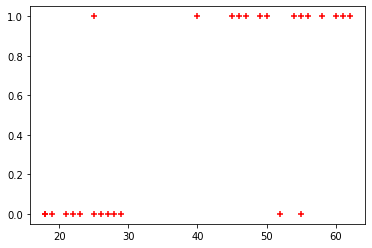

In [ ]:
plt.scatter(data.age,data.bought_insurance,marker='+',color='red')

On peut facilement observer à partir du nuage de points que généralement le client âgé de moins de 30 ans n'a pas souscrit à l'assurance.

## Séparation des variables d'entrée et de sortie
Avant de créer un modèle d'apprentissage automatique, nous séparons toujours les variables d'entrée et les variables de sortie. Les variables d'entrée sont les quantités dont les valeurs sont modifiées naturellement dans une expérience, tandis que la variable de sortie est celle dont les valeurs dépendent des variables d'entrée. Ainsi, les variables d'entrée sont également appelées variables indépendantes car leurs valeurs ne dépendent d'aucune autre quantité, et les variables de sortie sont également appelées variables dépendantes car ses valeurs dépendent d'autres variables, c'est-à-dire les variables d'entrée. Comme ici dans ces données, nous pouvons voir que le fait qu'une personne achète une assurance ou non dépend de l'âge de cette personne

Par convention, les variables d'entrée sont représentées par «X» et les variables de sortie par «y».

In [ ]:
X = data[['age']]     # input variable

y = data['bought_insurance']    # output variable

Si vous remarquez la cellule de code ci-dessus, j'ai utilisé deux crochets tout en prenant des variables d'entrée et un seul crochet tout en prenant la variable de sortie. Pourquoi?

Tous les algorithmes d'apprentissage automatique acceptent les variables d'entrée en tant que tableau 2D et les variables de sortie en tant que tableau 1D. L'utilisation de deux crochets lors de la sélection des variables d'entrée vous donne la forme de la / des variable / s d'entrée en 2D, mais si vous n'utilisez qu'un seul crochet, la forme sera 1D comme vous pouvez le voir dans le cas de y.

Vérifions les formes de X et y.

In [ ]:
print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (27, 1) Dimension:  2
Shape:  (27,) Dimension:  1


## Diviser les données en train et ensemble de test
Nous voulons vérifier les performances du modèle que nous avons construit. À cette fin, nous divisons toujours (à la fois les données d'entrée et de sortie) les données données en ensemble d'apprentissage qui sera utilisé pour entraîner le modèle, et ensemble de test qui sera utilisé pour vérifier avec quelle précision le modèle prévoit les résultats.

Pour cela, nous avons une classe appelée 'train_test_split' dans le module 'sklearn.model_selection'.

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.
 
# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

## Building Model


Maintenant, nous sommes enfin prêts et nous pouvons former le modèle.

Tout d'abord, nous devons importer notre modèle - Régression logistique (encore une fois, en utilisant la bibliothèque sklearn).

Ensuite, nous alimenterions le modèle à la fois avec les données (X_train) et les réponses pour ces données (y_train)


In [ ]:
# import Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
# Fit the model
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The training happens in the third line (the "fit" function).

## Prédiction
Maintenant, le modèle de régression logistique (c'est-à-dire log_model) est formé à l'aide des données X_train et y_trian. Prédisons la valeur cible (c.-à-d. Buy_insurance) pour les données X_test. Nous utilisons la méthode "predire ()" pour la prédiction.

In [ ]:
predictions = log_model.predict(X_test)

We already have actual target values (i.e. y_test) for X_test. Let's compare y_test and the predicted value for X_test by our log_model.

In [ ]:
y_test.values

array([1, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
predictions

array([1, 0, 1, 0, 0, 0, 0, 1, 0])

There is one person who had actually bought insurance but our model predicted that the person had not bought insurance. So, there is one misclassified data by our model.

## Model Performance
We can also check how accurate our model is performing using the 'accuracy_score' class from 'sklearn.metrics'.

In [ ]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions) 

array([[5, 0],
       [1, 3]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()   # ravel() will convert the 2D numpy array into 1D.
print(tn, fp, fn, tp)

5 0 1 3


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, predictions)

0.8888888888888888

** Pourquoi un score de précision? **

La précision est une excellente mesure lorsque vous avez des ensembles de données symétriques où les valeurs des faux positifs et des faux négatifs sont presque identiques. Comme vous pouvez le voir dans la matrice de confusion ci-dessus, les faux positifs (fp = 0) et les faux négatifs (fn = 1) sont presque identiques. Donc, ici, le score de précision est la meilleure mesure.


Further reading: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

Our model is predicting 88.9% correct results.

### Merci d'avoir lu le Notebook!!!

## Exercise
**Instructions:**

Utilisez le lien GitHub de données brutes: https://raw.githubusercontent.com/dphi-official/Datasets/master/HR_comma_sep.csv 

Ou vous pouvez le télécharger ici à partir d'[ici](https://www.kaggle.com/giripujar/hr-analytics)

**Exercise:**

* Chargez les bibliothèques et les données.
* Effectuer une analyse exploratoire des données pour déterminer quelles variables ont un impact direct et clair sur la rétention des employés (c'est-à-dire s'ils quittent l'entreprise ou continuent de travailler)
* Tracez des graphiques à barres montrant l'impact des salaires des employés sur la rétention
* Voir la corrélation entre le service et la rétention des employés
* Variables dépendantes et indépendantes séparées.
* Divisez les données en ensemble de train et ensemble de test
* Maintenant, construisez un modèle de régression logistique et faites une prédiction pour les données de test
* Mesurer la précision du modèle


**References:**

https://github.com/codebasics/py/blob/master/ML/7_logistic_reg/7_logistic_regression.ipynb